Path to dataset files: /kaggle/input/eyepacs-aptos-messidor-diabetic-retinopathy
Starting Exploratory Data Analysis...
1. Dataset Structure Analysis
--------------------------------------------------
Dataset stats: {'train': 73995, 'val': 9245, 'test': 9261}


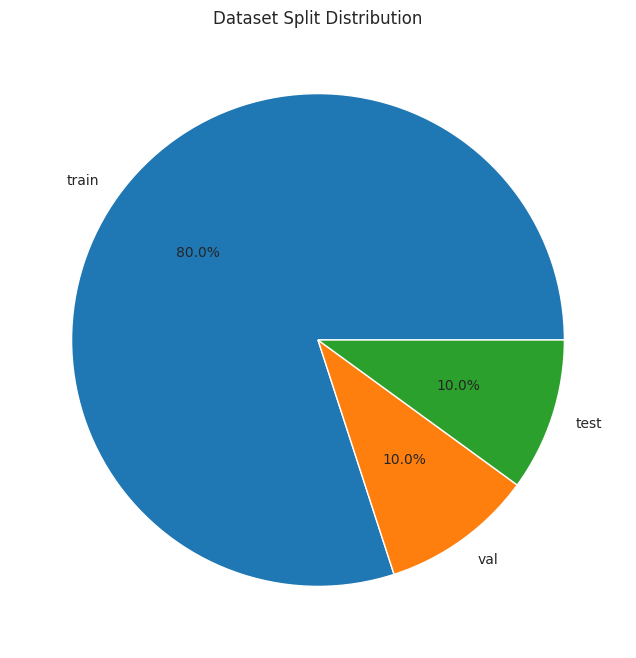


2. Image Properties Analysis
--------------------------------------------------
Processing train split...
Processed 25/100 images in train
Processed 50/100 images in train
Processed 75/100 images in train
Processed 100/100 images in train
Processing val split...
Processed 25/100 images in val
Processed 50/100 images in val
Processed 75/100 images in val
Processed 100/100 images in val
Processing test split...
Processed 25/100 images in test
Processed 50/100 images in test
Processed 75/100 images in test
Processed 100/100 images in test

Image Dimensions Statistics:
            height        width     size_kb
count   300.000000   300.000000  300.000000
mean    890.456667  1001.630000  191.072585
std     216.900301   271.867737   66.620935
min     224.000000   224.000000   15.872070
25%     813.750000  1024.000000  165.029053
50%     873.000000  1024.000000  188.374023
75%    1018.000000  1024.000000  226.812744
max    2848.000000  4288.000000  787.749023

Full Statistics DataFrame (fir

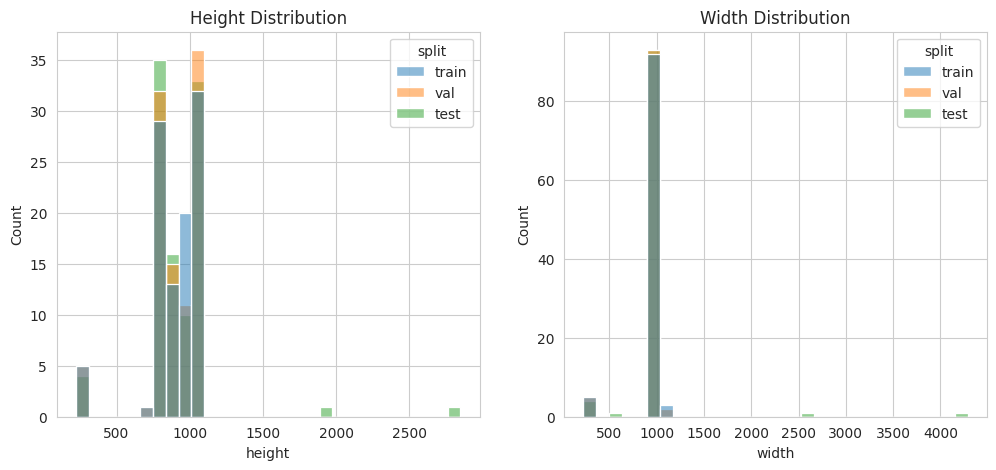

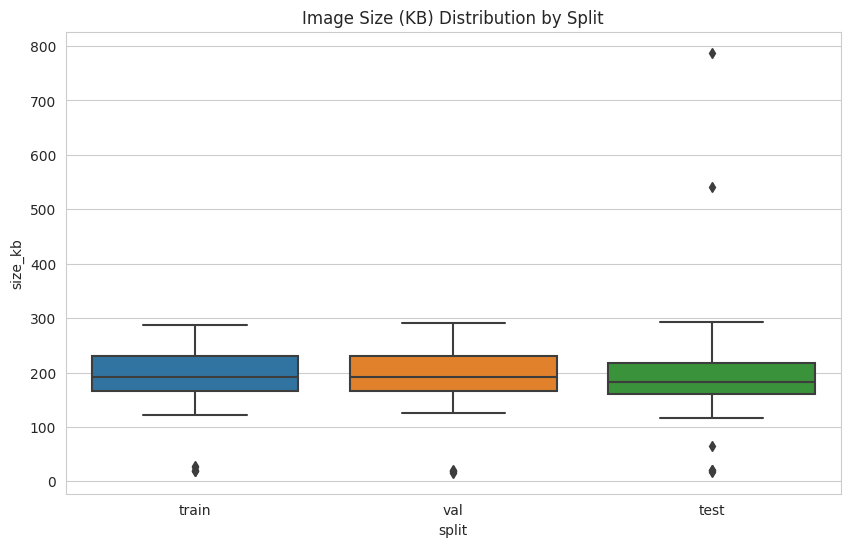


3. Channel Analysis
--------------------------------------------------
Channel distribution:
Images with 3 channels: 300

EDA completed successfully


In [6]:
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter

# Download dataset
print("Downloading dataset...")
path = kagglehub.dataset_download("ascanipek/eyepacs-aptos-messidor-diabetic-retinopathy")
print("Path to dataset files:", path)

# Set directory
INPUT_DIR = os.path.join(path, "dr_unified_v2", "dr_unified_v2")

# Function to get image statistics
def get_image_stats(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None
        height, width = img.shape[:2]
        size = os.path.getsize(image_path) / 1024  # Size in KB
        return {
            'height': height,
            'width': width,
            'size_kb': size,
            'channels': img.shape[2] if len(img.shape) == 3 else 1,
            'filename': os.path.basename(image_path)
        }
    except:
        return None

# Function to analyze dataset structure
def analyze_dataset_structure(input_dir):
    splits = ['train', 'val', 'test']
    dataset_stats = {}
    all_images = {}
    
    for split in splits:
        split_path = os.path.join(input_dir, split)
        if not os.path.exists(split_path):
            print(f"Warning: {split} directory not found")
            continue
        
        images = []
        for class_dir in ['0', '1', '2', '3', '4']:
            class_path = os.path.join(split_path, class_dir)
            if os.path.exists(class_path):
                jpg_files = [os.path.join(class_path, f) for f in os.listdir(class_path) 
                           if f.endswith('.jpg')]
                images.extend(jpg_files)
        
        dataset_stats[split] = len(images)
        all_images[split] = images
    
    return dataset_stats, all_images

# Function to perform comprehensive EDA
def perform_eda(input_dir):
    # 1. Dataset Structure Analysis
    print("1. Dataset Structure Analysis")
    print("-" * 50)
    dataset_stats, all_images = analyze_dataset_structure(input_dir)
    print(f"Dataset stats: {dataset_stats}")
    
    # Display pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(dataset_stats.values(), labels=dataset_stats.keys(), autopct='%1.1f%%')
    plt.title('Dataset Split Distribution')
    plt.show()
    
    # 2. Image Properties Analysis
    print("\n2. Image Properties Analysis")
    print("-" * 50)
    
    all_image_stats = []
    for split, images in all_images.items():
        print(f"Processing {split} split...")
        sample_size = min(100, len(images))  # Sample 100 images per split
        if sample_size > 0:
            sampled_images = np.random.choice(images, sample_size, replace=False)
            for i, img_path in enumerate(sampled_images):
                stats = get_image_stats(img_path)
                if stats:
                    stats['split'] = split
                    all_image_stats.append(stats)
                if (i + 1) % 25 == 0:
                    print(f"Processed {i + 1}/{sample_size} images in {split}")
    
    # Convert to DataFrame and display
    df_stats = pd.DataFrame(all_image_stats)
    print("\nImage Dimensions Statistics:")
    print(df_stats[['height', 'width', 'size_kb']].describe())
    print("\nFull Statistics DataFrame (first 10 rows):")
    print(df_stats.head(10))
    
    # Display visualizations
    # Image Size Distribution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_stats, x='height', hue='split', bins=30)
    plt.title('Height Distribution')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_stats, x='width', hue='split', bins=30)
    plt.title('Width Distribution')
    plt.show()
    
    # Size in KB distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='split', y='size_kb', data=df_stats)
    plt.title('Image Size (KB) Distribution by Split')
    plt.show()
    
    # 4. Channel Analysis
    print("\n3. Channel Analysis")
    print("-" * 50)
    channel_counts = Counter(df_stats['channels'])
    print("Channel distribution:")
    for channels, count in channel_counts.items():
        print(f"Images with {channels} channels: {count}")
    
    return df_stats

# Main execution
if __name__ == "__main__":
    sns.set_style("whitegrid")
    print("Starting Exploratory Data Analysis...")
    print("=" * 50)
    
    stats_df = perform_eda(INPUT_DIR)
    
    if stats_df is not None:
        print("\nEDA completed successfully")
    else:
        print("\nEDA failed")